#**CS 133 Term Project**

 

**Project Deliverables**

1. Each project team will choose one of the following data sets for their project. Create a Google Colab notebook to perform the data analysis and visualization for this project. Create and answer at least 5 unique questions using different types of plots to help you understand the data. One of the plots must be a map visualization. Besides the map, one of the plots must be an interactive plot. You can create additional categorical columns or reshape your data to help you understand the data.

2. Each data set has a prediction goal. Create a test set and a training set using the original data set. 

3. Follow the steps that we use in Lecture and Hands-ons 15 and 16 to prepare the data and pipeline for training a few ML classification or regression models that can perform the prediction as indicated in the data set description. Use any strategy that you see fit. Use N-fold cross-validation to evaluate the performance of each model.

4. Use the appropriate metrics to evaluate the models' performance. Select the best one for fine-tuning.

5. Test your best and fine-tuned ML model using the test set.

6. Create a Google slideshow presentation (5-10 min long) in which your group with explain the following:

   - How the data visualization help you with choosing certain strategies in developing the ML training pipeline
   - What strategy is used to create test/train data
   - What ML models are chosen, and why are they suitable for this analysis
the performance of all trained models (including the performance metrics)
   - Show the prediction performance of the best ML model using the test set. 
   - To wrap up, discuss the challenges you have encountered and/or any other thoughts you have about this project. 

7. Submit the urls for the Colab notebook and the Google slides in Canvas.



---

#**World Happiness 2005 - 2021**

<img src="https://ggsc.s3.amazonaws.com/images/uploads/Stick_figure_map_of_world.jpg" width=600>  
<font color=gray size=2>Image Credit: UC Berkeley</font>

The World Happiness Report is a publication of the Sustainable Development Solutions Network, powered by the Gallup World Poll data. Life evaluations from the Gallup World Poll provide the basis for the annual happiness rankings that have always sparked widespread interest. We can learn what factors contribute to the secrets of life in the happiest countries. 

Here are the descriptions of the data:

- `Country_name` - Name of the country
- `year` - This dataset contains survey data of the state of global happiness from 2005 to 2021.
- `Life_Ladder` - Also know as, Cantril ladder. Respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale.
- `Log_GDP_per_capita` - is in terms of Purchasing Power Parity (PPP) adjusted to constant 2011 international dollars, taken from the World Development Indicators (WDI) released by the World Bank on November 14, 2018. The equation uses the natural log of GDP per capita, as this form fits the data significantly better than GDP per capita.
- `Social_support` - is the national average of the binary responses (either 0 or 1) to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
- `Healthy_life_expectancy_at_birth` - are constructed based on data from the World Health Organization (WHO) Global Health Observatory data repository, with data available for 2005, 2010, 2015, and 2016. To match this report’s sample period, interpolation and extrapolation are used.
- `Freedom_to_make_life_choices` - is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”
- `Generosity` - is the residual of regressing the national average of GWP responses to the question “Have you donated money to a charity in the past month?” on GDP per capita.
- `Perceptions_of_corruption` - are the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of business corruption is used as the overall corruption-perception measure.
- `Positive_affect` - is defined as the average of previous-day affect measures for happiness, laughter, and enjoyment for GWP waves 3-7 (years 2008 to 2012, and some in 2013). It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked. The general form for the affect questions is: Did you experience the following feelings during a lot of the day yesterday? 
- `Negative_affect` - is defined as the average of previous-day affect measures for worry, sadness, and anger for all waves.
- `Confidence_in_national_government` - level of trust in government


Data source credit: [World Happiness Report](https://worldhappiness.report/)


###**Prediction**

You are tasked to build a ML model to predict the Life Ladder - the measure of happiness. 



In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = 'https://raw.githubusercontent.com/csbfx/cs133/main/world_happiness_2005-2021.csv'
df = pd.read_csv(data)
df

,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect,Confidence_in_national_government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


In [ ]:
df = df.rename(columns={"Country_name": "Country",
                        "year": "Year",
                        "Life_Ladder":"Happiness", 
                        "Log_GDP_per_capita":"Wealth", 
                        "Social_support":"Social Support",
                        "Healthy_life_expectancy_at_birth":"Life Expectancy",
                        "Freedom_to_make_life_choices":"Freedom",
                        "Perceptions_of_corruption":"Corruption Perceptions",
                        "Positive_affect":"Positive Affect",
                        "Negative_affect":"Negative Affect",
                        "Confidence_in_national_government": "Nat Gov Confidence"})
df

,Country,Year,Happiness,Wealth,Social Support,Life Expectancy,Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Affect,Nat Gov Confidence
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2089 non-null   object 
 1   Year                    2089 non-null   int64  
 2   Happiness               2089 non-null   float64
 3   Wealth                  2062 non-null   float64
 4   Social Support          2076 non-null   float64
 5   Life Expectancy         2031 non-null   float64
 6   Freedom                 2057 non-null   float64
 7   Generosity              2009 non-null   float64
 8   Corruption Perceptions  1976 non-null   float64
 9   Positive Affect         2065 non-null   float64
 10  Negative Affect         2073 non-null   float64
 11  Nat Gov Confidence      1873 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 196.0+ KB


## Question 1: What region of the world has the highest Happiness in recent years?

In [ ]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
   
# Declare an empty list to store latitude and longitude of values 
# of city column
longitude = []
latitude = []
   
# function to find the coordinate of a given city 
def findGeocode(city):
    # try and catch is used to overcome the exception thrown by geolocator
    # using geocodertimedout  
    try:
        # Specify the user_agent as your app name and it should not be none
        geolocator = Nominatim(user_agent="CS133")
        return geolocator.geocode(city)
    except GeocoderTimedOut:
        return None    

In [ ]:
data1 = df[df.Year == 2021]
data1

,Country,Year,Happiness,Wealth,Social Support,Life Expectancy,Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Affect,Nat Gov Confidence
12,Afghanistan,2021,2.436034,NaN,0.454175,54.549999,0.394306,NaN,0.946299,0.178886,0.606713,0.255620
26,Albania,2021,5.255482,9.562287,0.701883,69.150002,0.827453,0.044742,0.896127,0.553830,0.253654,0.472924
36,Algeria,2021,5.217018,9.303516,0.840710,66.599998,0.558487,-0.111191,0.711900,0.498022,0.257779,NaN
56,Argentina,2021,5.908279,9.955421,0.882305,67.199997,0.819479,-0.008816,0.816257,0.684860,0.345132,0.326574
71,Armenia,2021,5.300569,9.500485,0.762044,67.650002,0.795170,-0.150132,0.705334,0.565782,0.477540,0.297146
...,...,...,...,...,...,...,...,...,...,...,...,...
2013,Uzbekistan,2021,6.185308,8.941695,0.895504,65.300003,0.927415,0.188775,0.661562,0.698459,0.232672,0.912673
2029,Venezuela,2021,5.107553,NaN,0.812418,64.050003,0.595620,NaN,0.823898,0.697587,0.389351,0.175912
2045,Vietnam,2021,5.540250,9.028702,0.799494,65.500000,0.896800,0.126362,0.797788,0.650598,0.280437,NaN
2072,Zambia,2021,3.082155,8.087629,0.619071,55.250000,0.832574,0.142837,0.824031,0.655690,0.348551,0.697678


In [ ]:
# each value from city column
# will be fetched and sent to
# function find_geocode   
for i in (data1["Country"]):
    if findGeocode(i) != None:
        loc = findGeocode(i)
        # coordinates returned from function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

# now add the Longitude and Latitude columns to dataframe
data1["Longitude"] = longitude
data1["Latitude"] = latitude
  
data1 = data1.dropna()
data1

<ipython-input-7-0823f697d3be>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Longitude"] = longitude
<ipython-input-7-0823f697d3be>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Latitude"] = latitude


,Country,Year,Happiness,Wealth,Social Support,Life Expectancy,Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Affect,Nat Gov Confidence,Longitude,Latitude
26,Albania,2021,5.255482,9.562287,0.701883,69.150002,0.827453,0.044742,0.896127,0.553830,0.253654,0.472924,19.999962,41.000028
56,Argentina,2021,5.908279,9.955421,0.882305,67.199997,0.819479,-0.008816,0.816257,0.684860,0.345132,0.326574,-64.967282,-34.996496
71,Armenia,2021,5.300569,9.500485,0.762044,67.650002,0.795170,-0.150132,0.705334,0.565782,0.477540,0.297146,44.673665,40.769627
86,Australia,2021,7.111599,10.818342,0.919755,71.050003,0.912402,0.237518,0.453676,0.739800,0.235314,0.519226,134.755000,-24.776109
100,Austria,2021,7.079641,10.892092,0.862976,71.150002,0.794846,0.161673,0.500809,0.721865,0.259080,0.610459,14.124560,47.593970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,United_States,2021,6.959088,11.055173,0.920009,65.849998,0.815735,0.192203,0.686592,0.739682,0.277192,0.404625,-100.445882,39.783730
1998,Uruguay,2021,6.501700,10.010917,0.913873,67.500000,0.898724,-0.047107,0.605642,0.746208,0.263210,0.485831,-56.020153,-32.875555
2013,Uzbekistan,2021,6.185308,8.941695,0.895504,65.300003,0.927415,0.188775,0.661562,0.698459,0.232672,0.912673,63.952810,41.323730
2072,Zambia,2021,3.082155,8.087629,0.619071,55.250000,0.832574,0.142837,0.824031,0.655690,0.348551,0.697678,27.558988,-14.518912


In [ ]:
# Create a Choropleth map to show the Happiness rates
import folium
map_lat = data1['Latitude']
map_long = data1['Longitude']

happy_map = folium.Map(location=[map_lat.iloc[0], map_long.iloc[0]], zoom_start=2)
for i in range(0,len(data1)):
   Happiness_rate = data1.iloc[i]['Happiness']
   lat = float(data1.iloc[i]['Latitude'])
   long_ = float(data1.iloc[i]['Longitude'])
   folium.Circle(
      location=[lat, long_],
      popup=data1.iloc[i]['Country']+', '+str(Happiness_rate), 
      radius=Happiness_rate*35000,
      color='purple',
      fill=True,
      fill_color='purple'
   ).add_to(happy_map)

# Show the map
happy_map

## Question 2: Which columns have the most correlation?

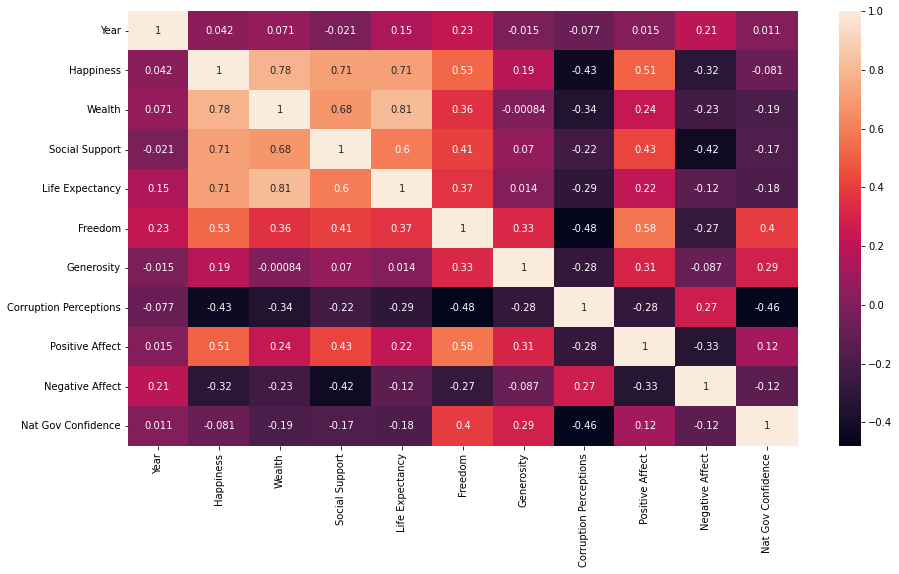

In [ ]:
import seaborn as sns

x = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(x,annot = True)

## Question 3: Proportion of Freedom in Countries

In [ ]:
df.Freedom.describe()

count    2057.000000
mean        0.745462
std         0.140751
min         0.257534
25%         0.651689
50%         0.767357
75%         0.857677
max         0.985178
Name: Freedom, dtype: float64

In [ ]:
df['freedom_cat'] = ["<0.3" if freedom < 0.30
               else "0.3-0.5" if 0.30 <= freedom < 0.50 
               else "0.5-0.7" if 0.50 <= freedom < 0.70 
               else "0.7-0.8" if 0.70 <= freedom < 0.80
               else "0.8-0.9" if 0.80 <= freedom < 0.90
               else "0.9-0.95" if 0.90 <= freedom < 0.95
               else "0.95+" for freedom in list(df['Freedom'].values) ]
df['freedom_cat'].value_counts()

0.5-0.7     569
0.8-0.9     538
0.7-0.8     531
0.9-0.95    249
0.3-0.5     121
0.95+        76
<0.3          5
Name: freedom_cat, dtype: int64

In [ ]:
df_freedom_cat = df['freedom_cat'].value_counts().to_frame().reset_index()
df = df.drop(columns=['freedom_cat'])
df_freedom_cat.columns = ['Degree of Freedom', 'Number of Countries']
df_freedom_cat

,Degree of Freedom,Number of Countries
0,0.5-0.7,569
1,0.8-0.9,538
2,0.7-0.8,531
3,0.9-0.95,249
4,0.3-0.5,121
5,0.95+,76
6,<0.3,5


In [ ]:
import plotly.express as px

fig = px.pie(df_freedom_cat, 
             values='Number of Countries', 
             names='Degree of Freedom', 
             title='Proportion of Freedom in Countries', 
             color_discrete_sequence=px.colors.sequential.RdBu
             )
fig.show()

## Question 4: What is the relationship between Positive and Negative Affect in Wealthier and Poorer Countries?

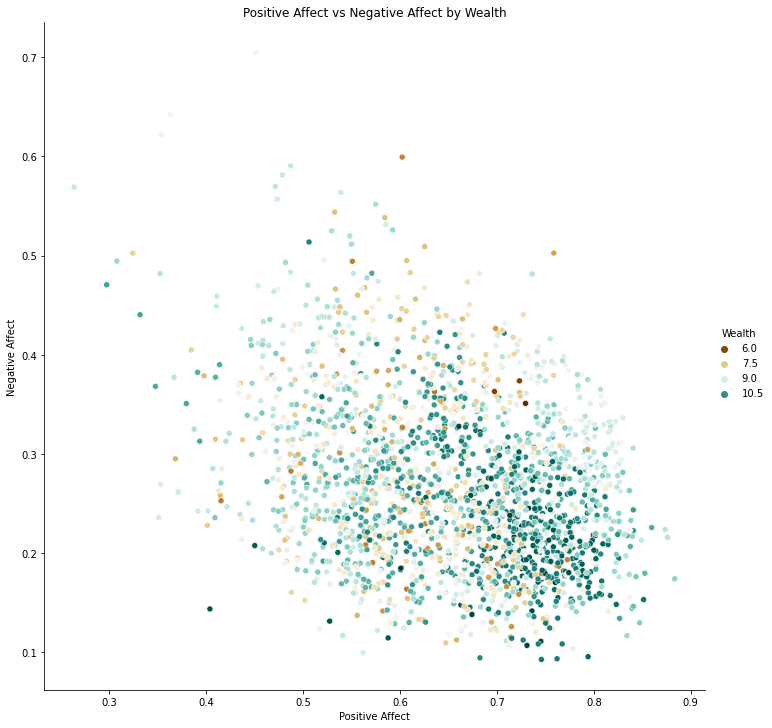

In [ ]:
sns.relplot(
    data=df,
    x="Positive Affect",
    y="Negative Affect",
    hue="Wealth",
    sizes=(2,150),
    height=10,
    palette="BrBG"
)
plt.title("Positive Affect vs Negative Affect by Wealth");

## Question 5: What is the relationship between Corruption Perceptions and National Government Confidence for Poorer Countries?

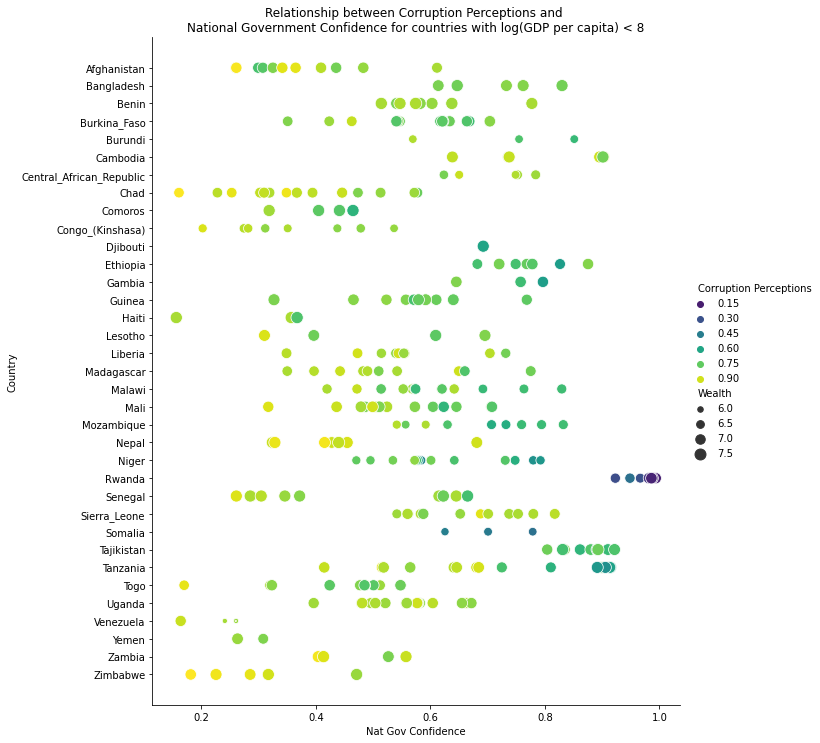

In [ ]:
sns.relplot(
    data=df[df["Wealth"] < 8],
    y="Country",
    x="Nat Gov Confidence",
    hue="Corruption Perceptions",
    sizes=(2,150),
    size="Wealth",
    height=10,
    palette="viridis"
)
plt.title("Relationship between Corruption Perceptions and \nNational Government Confidence for countries with log(GDP per capita) < 8");

# Machine Learning

# 2. Each data set has a prediction goal. Create a test set and a training set using the original data set

In [ ]:
# Your code here . . .
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = "Happiness"), df["Happiness"], test_size=0.2, random_state=42)

In [ ]:
df = df[df.Wealth.isnull() == False]
df

,Country,Year,Happiness,Wealth,Social Support,Life Expectancy,Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Affect,Nat Gov Confidence
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


In [ ]:
df.Wealth.describe()

count    2062.000000
mean        9.378408
std         1.143520
min         5.526723
25%         8.473547
50%         9.463269
75%        10.347656
max        11.665803
Name: Wealth, dtype: float64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit


import numpy as np

df["wealth_cat"] = pd.cut(df["Wealth"],
                              bins=[0.0, 5.0, 7.0, 9.0, 11.0, np.inf],
                              labels=[1, 2, 3, 4, 5])

<ipython-input-15-5d639365bac6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["wealth_cat"] = pd.cut(df["Wealth"],


In [ ]:
df["wealth_cat"].value_counts()

4    1265
3     687
5      77
2      33
1       0
Name: wealth_cat, dtype: int64

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["wealth_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# Now we should remove the income_cat attribute so that 
# the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

KeyError: ignored

#3. Follow the steps that we use in Lecture and Hands-ons 15 and 16 to prepare the data and pipeline for training a few ML classification or regression models that can perform the prediction as indicated in the data set description. Use any strategy that you see fit. Use N-fold cross-validation to evaluate the performance of each model.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

enc = OrdinalEncoder()
enc.fit(df[["Country"]])
df[["Country"]] = enc.transform(df[["Country"]])
df


,Country,Year,Happiness,Wealth,Social Support,Life Expectancy,Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Affect,Nat Gov Confidence
0,0.0,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,0.0,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,0.0,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,0.0,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,0.0,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,165.0,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2085,165.0,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2086,165.0,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2087,165.0,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


In [ ]:
df = df.drop(columns=['wealth_cat'])

KeyError: ignored

In [ ]:
df = df.dropna()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

df_num = df.drop(columns=['Country','Happiness'])

In [ ]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # fill in missing values with median values
        ('std_scaler', StandardScaler()),              # feature scaling
    ])

In [ ]:
num_attribs = list(df_num)
cat_attribs = ["Country"]

print(num_attribs)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

df_prepared = full_pipeline.fit_transform(df)

['Year', 'Wealth', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption Perceptions', 'Positive Affect', 'Negative Affect', 'Nat Gov Confidence']


In [ ]:
df_prepared

array([[-1.34171500e+00, -1.76532349e+00, -2.96302734e+00, ...,
        -1.42705031e-01,  6.62069676e-01,  0.00000000e+00],
       [-1.11332407e+00, -1.61852602e+00, -2.12836739e+00, ...,
        -4.00416142e-01,  6.59336826e-01,  0.00000000e+00],
       [-8.84933141e-01, -1.52628873e+00, -2.23703124e+00, ...,
         6.64663287e-02, -9.59859330e-01,  0.00000000e+00],
       ...,
       [ 1.17058522e+00, -9.92396872e-01, -4.29801520e-01, ...,
        -4.21641683e-01, -1.45055388e-01,  1.48000000e+02],
       [ 1.39897615e+00, -1.06089431e+00, -7.74021747e-01, ...,
         9.26346107e-01,  4.81729968e-01,  1.48000000e+02],
       [ 1.62736708e+00, -1.03020377e+00, -1.03754420e+00, ...,
        -3.44369638e-01,  9.40233076e-01,  1.48000000e+02]])

In [ ]:
cols = ['Year', 'Wealth', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption Perceptions', 'Positive Affect', 'Negative Affect', 'Nat Gov Confidence','Country']
prep_df = pd.DataFrame(
    df_prepared,
    columns=cols,
    index=df.index)
prep_df

,Year,Wealth,Social Support,Life Expectancy,Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Affect,Nat Gov Confidence,Country
0,-1.341715,-1.765323,-2.963027,-1.720953,-0.202969,1.055212,0.704162,-2.288802,-0.142705,0.662070,0.0
1,-1.113324,-1.618526,-2.128367,-1.679664,-0.487619,1.193068,0.531826,-1.657695,-0.400416,0.659337,0.0
2,-0.884933,-1.526289,-2.237031,-1.638374,-1.059340,0.762746,-0.248263,-1.324061,0.066466,-0.959859,0.0
3,-0.656542,-1.549774,-2.384604,-1.597084,-1.815830,1.021542,-0.115721,-1.672613,-0.033051,-0.918220,0.0
4,-0.428151,-1.475501,-2.388437,-1.555795,-1.561550,1.476064,0.126639,-0.415765,-0.023960,-0.254051,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2084,0.713803,-0.953846,-0.470984,-1.493861,0.048976,-0.719659,-0.006281,0.713691,-0.559674,1.028112,148.0
2085,0.942194,-0.925319,-0.296561,-1.428486,0.120460,-0.539210,0.500100,-0.001973,-0.710193,0.342760,148.0
2086,1.170585,-0.992397,-0.429802,-1.363111,-0.828673,-0.519382,0.426284,0.006584,-0.421642,-0.145055,148.0
2087,1.398976,-1.060894,-0.774022,-1.297735,-0.745963,-0.196910,0.196895,0.027497,0.926346,0.481730,148.0


In [ ]:
prep_df = prep_df.join(df["Happiness"])

In [ ]:
prep_df

,Year,Wealth,Social Support,Life Expectancy,Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Affect,Nat Gov Confidence,Country,Happiness
0,-1.341715,-1.765323,-2.963027,-1.720953,-0.202969,1.055212,0.704162,-2.288802,-0.142705,0.662070,0.0,3.723590
1,-1.113324,-1.618526,-2.128367,-1.679664,-0.487619,1.193068,0.531826,-1.657695,-0.400416,0.659337,0.0,4.401778
2,-0.884933,-1.526289,-2.237031,-1.638374,-1.059340,0.762746,-0.248263,-1.324061,0.066466,-0.959859,0.0,4.758381
3,-0.656542,-1.549774,-2.384604,-1.597084,-1.815830,1.021542,-0.115721,-1.672613,-0.033051,-0.918220,0.0,3.831719
4,-0.428151,-1.475501,-2.388437,-1.555795,-1.561550,1.476064,0.126639,-0.415765,-0.023960,-0.254051,0.0,3.782938
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,0.713803,-0.953846,-0.470984,-1.493861,0.048976,-0.719659,-0.006281,0.713691,-0.559674,1.028112,148.0,3.638300
2085,0.942194,-0.925319,-0.296561,-1.428486,0.120460,-0.539210,0.500100,-0.001973,-0.710193,0.342760,148.0,3.616480
2086,1.170585,-0.992397,-0.429802,-1.363111,-0.828673,-0.519382,0.426284,0.006584,-0.421642,-0.145055,148.0,2.693523
2087,1.398976,-1.060894,-0.774022,-1.297735,-0.745963,-0.196910,0.196895,0.027497,0.926346,0.481730,148.0,3.159802


In [ ]:
df_num = df.drop(columns = ["Happiness"])
num_attribs = list(df_num)
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # fill in missing values with median values
        ('std_scaler', StandardScaler()),              # feature scaling
    ])

df_num_tr = num_pipeline.fit_transform(df_num)
df_num_tr

array([[-1.72820699, -1.2857918 , -1.82849272, ..., -2.25259266,
        -0.14350054,  0.71623286],
       [-1.72820699, -1.06130212, -1.67893983, ..., -1.61528787,
        -0.39030858,  0.7133277 ],
       [-1.72820699, -0.83681243, -1.58497124, ..., -1.2783774 ,
         0.05682134, -1.00796258],
       ...,
       [ 1.68899716,  1.18359473, -1.04105816, ...,  0.06533423,
        -0.41063613, -0.14178333],
       [ 1.68899716,  1.40808441, -1.11084131, ...,  0.0864534 ,
         0.88032191,  0.52452231],
       [ 1.68899716,  1.6325741 , -1.0795747 , ..., -0.3952996 ,
        -0.33663326,  1.01193512]])

In [ ]:
data_df = pd.DataFrame(df_num_tr)
data_df_clean = data_df.join(df["Happiness"])
data_df_clean.columns = list(["Country", "Year", "Wealth", "Social Support", "Life Expectancy", "Freedom", "Generosity", "Corruption Perceptions", "Positive Affect", "Negative Affect", "Nat Gov Confidence", "Happiness"])
data_df_clean

,Country,Year,Wealth,Social Support,Life Expectancy,Freedom,Generosity,Corruption Perceptions,Positive Affect,Negative Affect,Nat Gov Confidence,Happiness
0,-1.728207,-1.285792,-1.828493,-3.045330,-1.856784,-0.198215,1.101101,0.728976,-2.252593,-0.143501,0.716233,3.723590
1,-1.728207,-1.061302,-1.678940,-2.187919,-1.813027,-0.479023,1.242246,0.554506,-1.615288,-0.390309,0.713328,4.401778
2,-1.728207,-0.836812,-1.584971,-2.299545,-1.769271,-1.043027,0.801658,-0.235245,-1.278377,0.056821,-1.007963,4.758381
3,-1.728207,-0.612323,-1.608897,-2.451140,-1.725514,-1.789305,1.066628,-0.101061,-1.630353,-0.038486,-0.963697,3.831719
4,-1.728207,-0.387833,-1.533231,-2.455078,-1.681757,-1.538457,1.531993,0.144301,-0.361162,-0.029779,-0.257652,3.782938
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,1.688997,0.734615,-1.001783,-0.485359,-1.616122,0.050329,-0.716112,0.009734,0.779386,-0.542829,1.105356,3.638300
2085,1.688997,0.959105,-0.972721,-0.306182,-1.546841,0.120848,-0.531358,0.522386,0.056693,-0.686980,0.376789,3.616480
2086,1.688997,1.183595,-1.041058,-0.443054,-1.477560,-0.815473,-0.511057,0.447657,0.065334,-0.410636,-0.141783,2.693523
2087,1.688997,1.408084,-1.110841,-0.796657,-1.408278,-0.733879,-0.180892,0.215426,0.086453,0.880322,0.524522,3.159802


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(prep_df.drop(columns = "Happiness"), prep_df["Happiness"], test_size=0.2, random_state=42)

# ML Learning Model

In [ ]:
model_name = []
avg_rsme = []
std_rsme = []

# Helper Function

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor(max_features=10,random_state=42)
tree_reg.fit(X_train, y_train)

predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.5480925037292373

In [ ]:
scores = cross_val_score(tree_reg, X_train, y_train, 
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.53008348 0.50241626 0.51913885 0.59263086 0.58014878 0.5149432
 0.64796371 0.55228346 0.57314846 0.57224797]
Mean: 0.5585005037637687
Standard deviation: 0.04180783244377145


In [ ]:
model_name.append("Decision Tree")
avg_rsme.append(tree_rmse_scores.mean())
std_rsme.append(tree_rmse_scores.std())


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)
predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.40571901000951893

In [ ]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.42180118 0.33174048 0.37167548 0.43065496 0.37718743 0.40442574
 0.49133526 0.42508259 0.42360634 0.38530076]
Mean: 0.4062810213622619
Standard deviation: 0.040947208769991084


In [ ]:
model_name.append("Random Forest")
avg_rsme.append(forest_rmse_scores.mean())
std_rsme.append(forest_rmse_scores.std())


# K NeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

KNN_model = KNeighborsRegressor()
KNN_model.fit(X_train, y_train)
predictions = KNN_model.predict(X_test)
KNN_mse = mean_squared_error(y_test, predictions)
KNN_rmse = np.sqrt(KNN_mse)
KNN_rmse

0.3695153388357516

In [ ]:
KNN_scores = cross_val_score(KNN_model, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
KNN_rmse_scores = np.sqrt(-KNN_scores)
display_scores(KNN_rmse_scores)

Scores: [0.36333506 0.35503015 0.34413152 0.41368134 0.34191831 0.39368211
 0.49500726 0.48133093 0.39059057 0.34925572]
Mean: 0.3927962956319281
Standard deviation: 0.05279597880655351


In [ ]:
model_name.append("K Nearest Neighbor")
avg_rsme.append(KNN_rmse_scores.mean())
std_rsme.append(KNN_rmse_scores.std())


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# train a linear regression model with our housing_prepared training data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.49841430635394346

In [ ]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.56298929 0.52787154 0.45067498 0.52448801 0.52634977 0.51975058
 0.57590376 0.57704127 0.53823817 0.55104558]
Mean: 0.535435294511317
Standard deviation: 0.034741091839392516


In [ ]:
model_name.append("Linear Regression")
avg_rsme.append(lin_rmse_scores.mean())
std_rsme.append(lin_rmse_scores.std())


# Model Compare

In [ ]:
summary_data = {
    "Model" : model_name,
    "Average RSME" : avg_rsme,
    "Standard deviation" : std_rsme
}

summary_df = pd.DataFrame(summary_data)
summary_df

,Model,Average RSME,Standard deviation
0,Decision Tree,0.545796,0.041575
1,Random Forest,0.407926,0.023744
2,K Nearest Neighbor,0.384180,0.027743
3,Linear Regression,0.534069,0.026179
4,Decision Tree,0.558501,0.041808
5,Random Forest,0.406281,0.040947
6,K Nearest Neighbor,0.392796,0.052796
7,Linear Regression,0.535435,0.034741


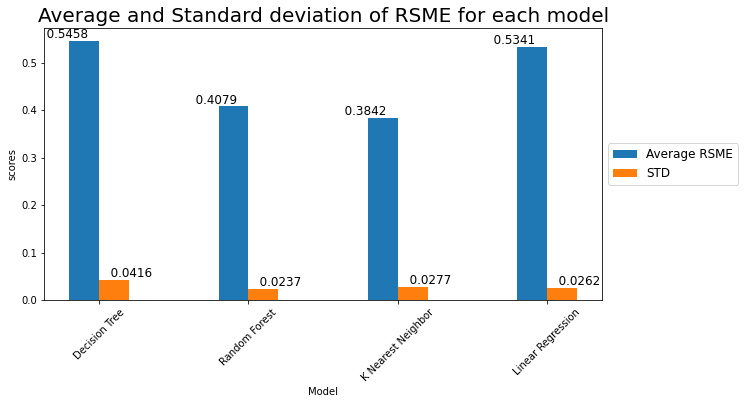

In [ ]:
X = summary_df["Model"]
agv = summary_df["Average RSME"]
std = summary_df["Standard deviation"]
  
X_axis = np.arange(len(X))
plt.figure(figsize=(10,5))
plt.bar(X_axis - 0.1, agv, 0.2, label = 'Average RSME')
plt.bar(X_axis + 0.1, std, 0.2, label = 'STD')

plt.rc('axes', titlesize= 20) 
plt.rc('axes', labelsize=20)  
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)
plt.rc('font', size=12)  
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for i in range(len(X)):
  plt.text(i, agv[i],"   " +str(round(agv[i],4)) + "   ",  ha = "right", va="bottom")
  plt.text(i, std[i],"   "+ str(round(std[i],4)) + "   ", ha = "left", va="bottom")


plt.xticks(X_axis, X, rotation = 45)
plt.xlabel("Model")
plt.ylabel("scores")
plt.title("Average and Standard deviation of RSME for each model")
plt.show()

# Tuning

In [ ]:
estimator = DecisionTreeRegressor(random_state=42)
estimator.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 10]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False, True], 'n_estimators': [3, 10, 20], 'max_features': [2, 3, 4, 5, 10]},
  ]

forest_reg = DecisionTreeRegressor(max_features=10, random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)


ValueError: ignored

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5084337215779436 {'max_features': 2, 'n_estimators': 3}
0.4304567433253704 {'max_features': 2, 'n_estimators': 10}
0.40947856281522355 {'max_features': 2, 'n_estimators': 30}
0.486023120292615 {'max_features': 4, 'n_estimators': 3}
0.40761334485275824 {'max_features': 4, 'n_estimators': 10}
0.4044546370082872 {'max_features': 4, 'n_estimators': 30}
0.4804843556567219 {'max_features': 6, 'n_estimators': 3}
0.42062337604028416 {'max_features': 6, 'n_estimators': 10}
0.40565886998151124 {'max_features': 6, 'n_estimators': 30}
0.465034638088001 {'max_features': 8, 'n_estimators': 3}
0.41963178286882774 {'max_features': 8, 'n_estimators': 10}
0.40536179184517207 {'max_features': 8, 'n_estimators': 30}
0.4847814937391185 {'max_features': 10, 'n_estimators': 3}
0.41633360107321515 {'max_features': 10, 'n_estimators': 10}
0.4067783995589209 {'max_features': 10, 'n_estimators': 30}
0.47945051519966564 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.40855033343636166 {'bootstrap':

In [ ]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 20}

In [ ]:
predictions = grid_search.best_estimator_.predict(X_test);
RF_mse = mean_squared_error(y_test, predictions)
RF_rmse = np.sqrt(lin_mse)
RF_rmse

0.49841430635394346

# Evaluate Best Model on Test Set

In [ ]:
final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

TypeError: ignored

#Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
model = grid_search.best_estimator_
print(model)
param_grid = { 'base_estimator' : [model],
              'n_estimators' : [10, 100, 1000],
              'bootstrap' : [True, False],
              'random_state' : [42]
              }


# original data set

bagging = BaggingRegressor()
grid_search_bag = GridSearchCV(bagging , param_grid, verbose = True)

grid_search_bag.fit(X_train, y_train)

predictions = grid_search_bag.best_estimator_.predict(X_test);
RF_mse = mean_squared_error(y_test, predictions)
RF_rmse = np.sqrt(lin_mse)
RF_rmse

RandomForestRegressor(bootstrap=False, max_features=3, n_estimators=20,
                      random_state=42)
Fitting 5 folds for each of 6 candidates, totalling 30 fits


0.5020004495547132